In [1]:
import pandas as pd
import numpy as np
import os
import math
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
cwd = os.getcwd()
fall = pd.read_csv(cwd +'/seasons/fall.csv')
spring = pd.read_csv(cwd +'/seasons/spring.csv')
summer = pd.read_csv(cwd +'/seasons/summer.csv')
winter = pd.read_csv(cwd +'/seasons/winter.csv')


In [3]:
delay = winter.append([spring,summer,fall])

In [4]:
import pickle
# get yearly flight info
infile = open('yearly_flights.pickle', 'rb')
yearly = pickle.load(infile)
infile.close()

In [5]:
yearly

{'Total Flights': 7321736,
 'Months': {'January Flights': 570118,
  'February Flights': 520731,
  'March Flights': 611987,
  'April Flights': 596046,
  'May Flights': 616529,
  'June Flights': 626193,
  'July Flights': 645299,
  'August Flights': 644673,
  'September Flights': 585749,
  'October Flights': 616101,
  'November Flights': 638985,
  'December Flights': 649325},
 'Seasons': {'Spring Flights': 1866428,
  'Summer Flights': 1910847,
  'Fall Flights': 1848775,
  'Winter Flights': 1695686},
 'Hour': {0: 35310,
  1: 17047,
  2: 3019,
  3: 1760,
  4: 1384,
  5: 60640,
  6: 452262,
  7: 475895,
  8: 460143,
  9: 430929,
  10: 466221,
  11: 445807,
  12: 456553,
  13: 428231,
  14: 428892,
  15: 434169,
  16: 431472,
  17: 433330,
  18: 469590,
  19: 382030,
  20: 417167,
  21: 255633,
  22: 238079,
  23: 96173},
 'Weekday': {1: 1101171,
  2: 1047272,
  3: 1061705,
  4: 1086862,
  5: 1094876,
  6: 890528,
  7: 1039322},
 'Part of Day': {'Morning Flights': 3051886,
  'Afternoon Flight

## Monthly 

In [6]:
month = ['Jan', 'Feb', 'March', 'April', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

month_ct = delay['MONTH'].value_counts()
freq = [month_ct[x] for x in range(1,13)]

In [7]:
# find pct of delays per month
m = yearly['Months']
f = list(m.values())
m_pct = []

#get a list of what % of flights were delayed per month
for x in range(len(f)):
    m_pct.append(round((freq[x]/f[x]) * 100,2))

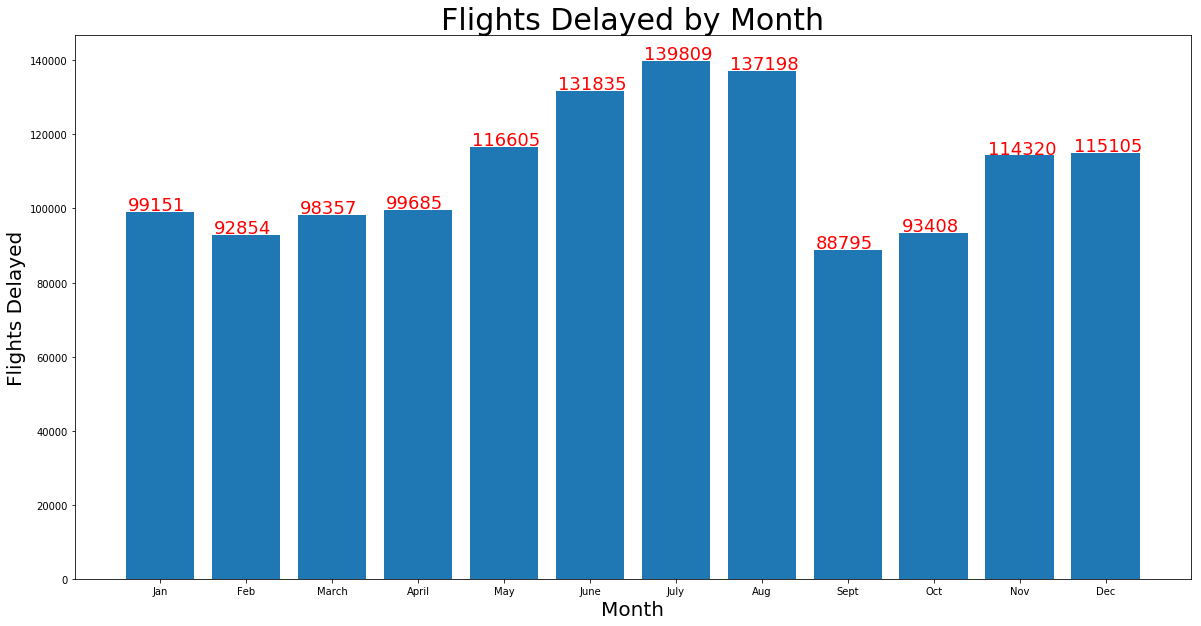

In [8]:
plt.figure(figsize=(20,10))
plt.bar(month, freq)
plt.title("Flights Delayed by Month", fontsize =30)
plt.xlabel('Month', fontsize =20)
plt.xticks(range(12))
plt.ylabel('Flights Delayed', fontsize =20)
for a,b in zip(range(12), freq):
    plt.text(a -.37 , b +500, str(b), fontsize =18,color ='r')
plt.show()

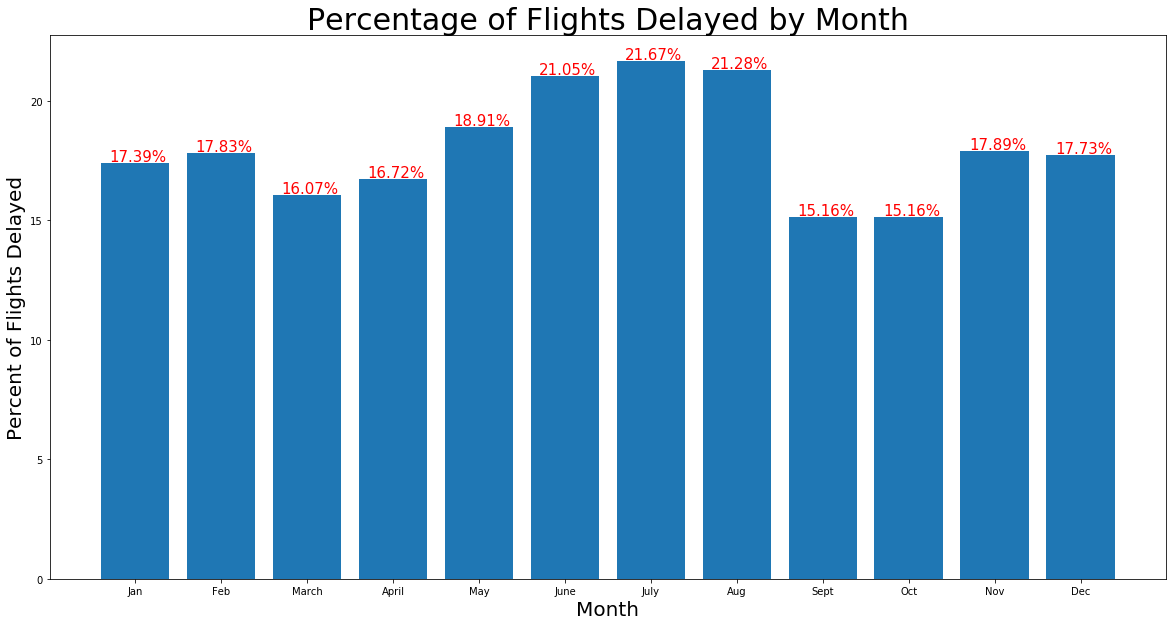

In [9]:
plt.figure(figsize=(20,10))
plt.bar(month, m_pct)
plt.title("Percentage of Flights Delayed by Month", fontsize =30)
plt.xlabel('Month', fontsize =20)
plt.xticks(range(12))
plt.ylabel('Percent of Flights Delayed', fontsize =20)
for a,b in zip(range(12), m_pct):
    plt.text(a -.3, b + .08, str(b) + '%', fontsize =15, color ='r')
plt.show()

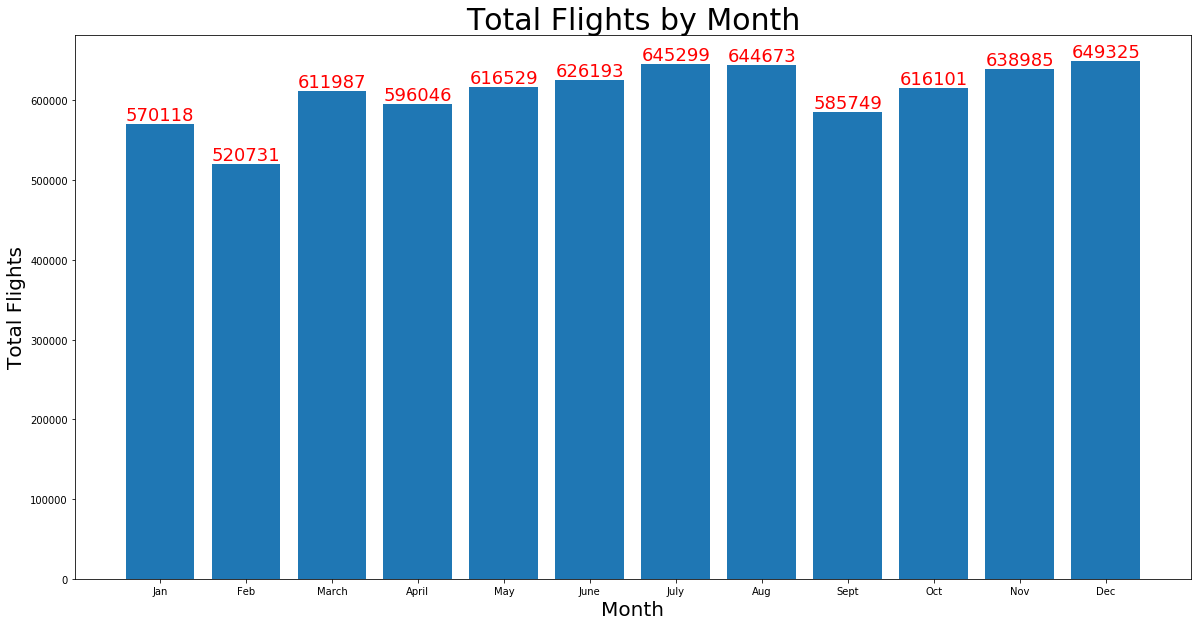

In [10]:
plt.figure(figsize=(20,10))
plt.bar(month, f)
plt.title("Total Flights by Month", fontsize =30)
plt.xlabel('Month', fontsize =20)
plt.xticks(range(12))
plt.ylabel('Total Flights', fontsize =20)
for a,b in zip(range(12), f):
    plt.text(a -.4, b +5000, str(b), fontsize =18, color ='r')
plt.show()

## Seasonal 

In [11]:
season = ['Fall', "Winter", "Spring", "Summer"]
amt = [len(fall), len(winter), len(spring), len(summer)]

In [12]:
# find pct of cancelations per season
s = yearly['Seasons']
sea = list(s.values())
s_pct = []

#get a list of what % of flights were canceled per season
for x in range(len(s)):
    s_pct.append(round((amt[x]/sea[x]) * 100,2))

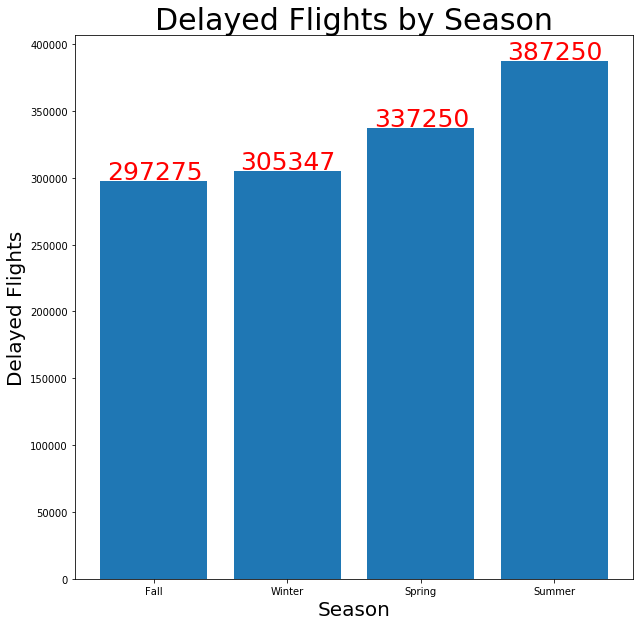

In [23]:
plt.figure(figsize=(10,10))
plt.bar(season, amt)
plt.title("Delayed Flights by Season", fontsize =30)
plt.xlabel('Season', fontsize =20)
plt.xticks(range(4))
plt.ylabel('Delayed Flights', fontsize =20)
for a,b in zip(range(4), amt):
    plt.text(a -.35 , b +1500, str(b), fontsize =25, color ='r')
plt.show()

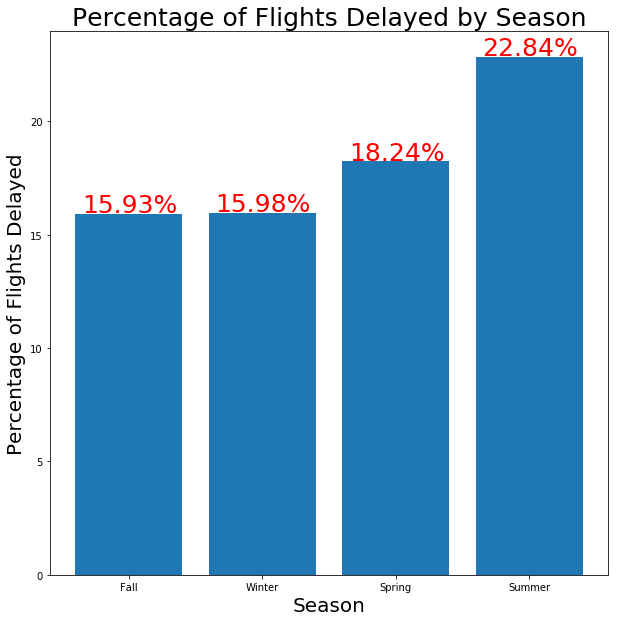

In [30]:
plt.figure(figsize=(10,10))
plt.bar(season, s_pct)
plt.title("Percentage of Flights Delayed by Season", fontsize =25)
plt.xlabel('Season', fontsize =20)
plt.xticks(range(4))
plt.ylabel('Percentage of Flights Delayed', fontsize =20)
for a,b in zip(range(4), s_pct):
    plt.text(a - .35, b +.08, str(b) + '%', fontsize =25, color ='r')
plt.show()

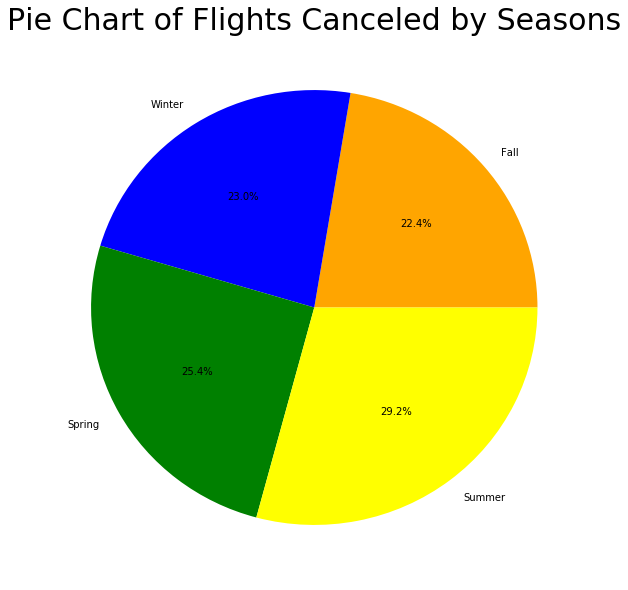

In [31]:
c = ['orange', 'blue', 'green','yellow']
plt.figure(figsize=(10,10))
plt.pie(amt, labels=season, colors= c, autopct='%1.1f%%')
plt.title("Pie Chart of Flights Canceled by Seasons", fontsize =30)
plt.show()

## Airline

#### <B><U> AIRLINE KEY
“9E” = "ENDEAVOR AIR" <br>
"AA" = "AMERICAN AIRLINES' <br>
"AS" = "ALASKA AIRLINES"<br>
"AX" = "TRANS STATES AIRLINES"<br>
"B6" = "JETBLUE AIRLINES"<br>
"C5" = "COMMUTAIR"<br>
"CP" = "COMPASS AIRLINES"<br>
"DL" = "DELTA AIRLINES"<br>
“EM” = “EMPIRE AIRLINES”<br>
“EV” = "EXPRESSJET AIRLINES"<br> 
"F9" = "FRONTIER AIRLINES"<br>
"G4" = "ALLEGIANT AIR"<br>
"G7" = "GOJET AIRLINES"<br>
"HA" = "HAWAIIAN AIRLINES"<br>
"KS" = "PENINSULA AIRWAYS”<br>
“MQ” = "ENVOY AIR"<br>
"NK" = "SPIRIT AIRLINES"<br>
“OH” = "PSA AIRLINES"<br>
“OO” = "SKYWEST AIRLINES"<br>
"PT" = "PIEDMONT AIRLINES"<br>
"QX" = "HORIZON AIR"<br>
"UA" = "UNITED AIRLINES"<br>
"VX” = ”VIRGIN AMERICA"<br>
"WN" = "SOUTHWEST AIRLINES"<br>
“YV” = ”MESA AIRLINES”<br>
“YX” = ”REPUBLIC AIRLINE”<br>
"ZW" = “AIR WISCONSIN”<br>

In [33]:
# get unique airlines and their counts
carrier = sorted(list(set(delay['OP_UNIQUE_CARRIER'])))
c_ct = delay['OP_UNIQUE_CARRIER'].value_counts()
carry = [c_ct[x] for x in carrier]

In [34]:
# find pct of cancelations per airline
a = yearly['Airlines']
line = list(a.values())
a_pct = []

#get a list of what % of flights were canceled per airline
for x in range(len(a)):
    a_pct.append(round((carry[x]/line[x]) * 100,2))

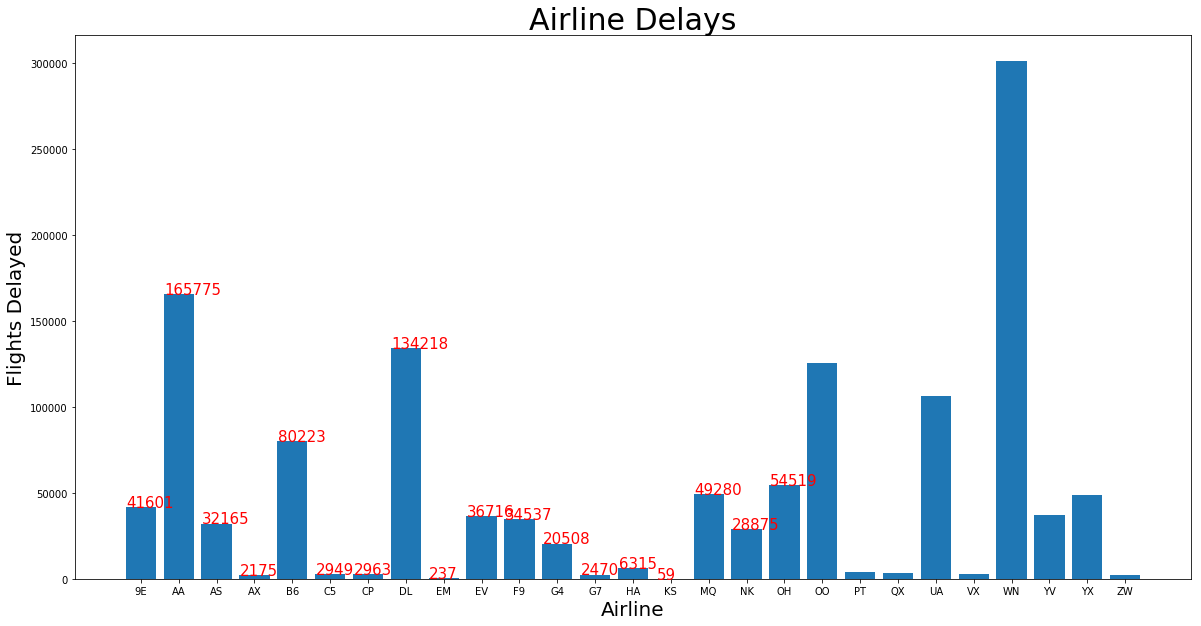

In [37]:
plt.figure(figsize=(20,10))
plt.bar(carrier, carry)
plt.title("Airline Delays", fontsize =30)
plt.xlabel('Airline', fontsize =20)
# plt.xticks(range(28))
plt.ylabel('Flights Delayed', fontsize =20)
for a,b in zip(range(28), carry):
    plt.text(a - .38, b + 100, str(b), fontsize =15, color ='r')
plt.show()

In [40]:
# 27 carriers
carrier

['9E',
 'AA',
 'AS',
 'AX',
 'B6',
 'C5',
 'CP',
 'DL',
 'EM',
 'EV',
 'F9',
 'G4',
 'G7',
 'HA',
 'KS',
 'MQ',
 'NK',
 'OH',
 'OO',
 'PT',
 'QX',
 'UA',
 'VX',
 'WN',
 'YV',
 'YX',
 'ZW']